<h1>K-Means Clustering</h1>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

<h6>Extracting the Latitude and Longitude features</h6>

In [7]:
fields = ['X','Y']
df = pd.read_csv('test.csv', usecols = fields)
numpyMatrix = df.as_matrix()
print (numpyMatrix)

[[-122.3995877    37.73505101]
 [-122.39152289   37.73243239]
 [-122.42600195   37.79221244]
 ..., 
 [-122.44541822   37.7120748 ]
 [-122.38739412   37.73947927]
 [-122.48971397   37.73394977]]


<h6>Scaling Features </h6>

In [8]:
for i in range(len(numpyMatrix)):
	x = numpyMatrix[i][0]
	x *= (-1)
	x %= 122
	x *= 100
	numpyMatrix[i][0] = x

	y = numpyMatrix[i][1]
	y %= 37
	y *= 100
	numpyMatrix[i][1] = y
print (numpyMatrix)

[[ 39.95877042  73.50510104]
 [ 39.1522893   73.24323864]
 [ 42.6001955   79.22124386]
 ..., 
 [ 44.54182238  71.20747966]
 [ 38.73941232  73.94792693]
 [ 48.97139691  73.39497681]]


<h6>Setting limits of the graph</h6>

In [9]:
plt.xlim(37.5, 52.5)
plt.ylim(70, 82.5)

(70, 82.5)

<h6>Setting Labels</h6>

In [10]:
plt.xlabel('Latitude')
plt.ylabel('Longitude')

<h6>Fitting the model</h6>

In [11]:
kmeans = KMeans(init = 'k-means++', n_clusters = 10, random_state = 56)
kmeans.fit(numpyMatrix)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=56, tol=0.0001, verbose=0)

<h6>Printing Cluster Centers</h6>

In [12]:
print('Printing Cluster Centers:')
print(kmeans.cluster_centers_)

Printing Cluster Centers:
[[    42.82660648     78.7330491 ]
 [ 12050.           1600.        ]
 [    42.1688556      72.39920951]
 [    48.99413117     75.97389272]
 [    41.83434515     75.90840495]
 [    40.4360745      79.62375104]
 [    40.91580185     78.07838776]
 [    39.14866152     73.3408716 ]
 [    45.81744144     72.27487452]
 [    45.31746213     77.21013721]]


<h6>Plotting clusters and centroids</h6>

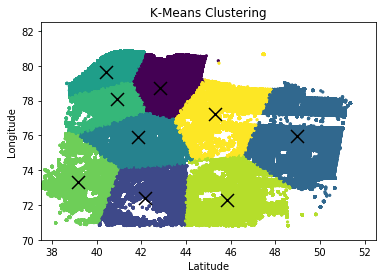

In [13]:
colors = [i for i in kmeans.labels_]
plt.scatter(numpyMatrix[:,0], numpyMatrix[:,1], s = 5, c = colors)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=169, linewidths=3,color='black', zorder=10)
plt.title('K-Means Clustering')
plt.figure(1)
plt.show()